# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]

A simple dataset to learn the basics.
3 flowers of Iris species. [see images on wikipedia link above]
1936 by Ronald Fisher.
Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
Importance of domain knowledge.
Why use petal and sepal dimensions as features?
Why do we not use 'color' as a feature?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the iris CSV file.
iris = pd.read_csv("C:\VipinML\Assignment1\iris.csv")

# (Q) how many data-points and features?
# Total 150 data points and 5 features are reported. 
print (iris.shape)


(150, 5)


In [2]:
#(Q) What are the column names in our dataset?
# Print all columns names as there in CSV file. 
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [3]:
#(Q) How many data points for each class are present? 

#virginica     50
#setosa        50
#versicolor    50

#(or) How many flowers for each species are present?

#virginica     50
#setosa        50
#versicolor    50

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

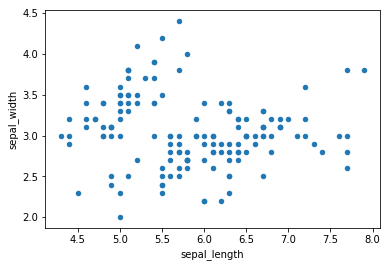

In [4]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.
# this is a scatter plot. x axis is column sepal_length and y axis is column sepal_width. 

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;

# matplotlib is used for plotting purpose.  even IK am using panda  plot to plot the graph, why do I need below command?? 

#plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

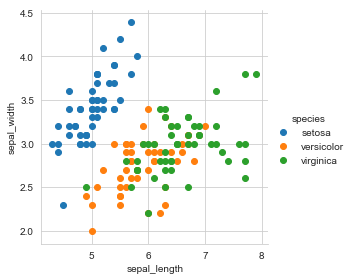

In [5]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 

# seaborn is powerful enough to draw graphs in diffeenrtt color and style. 
# Hue = species, that means my graph will be colored based on "Species" 

sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# Ans: yes by using pair plots.
# Ans: Data is imbalance, data  can be balanced by normalizing it if to draw multiple features in one plot.
# this is example of linearly seperated plot.
# 3d plot is better way to visualize data.

# How many cobinations exist? 4C2 = 6.
# This is good to know when using pair plot, as pair  plot will draw in pair for all combinatiobns of features. 

Observation(s):

Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
Seperating Versicolor from Viginica is much harder as they have considerable overlap.



## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

# (3.3) Pair-plot

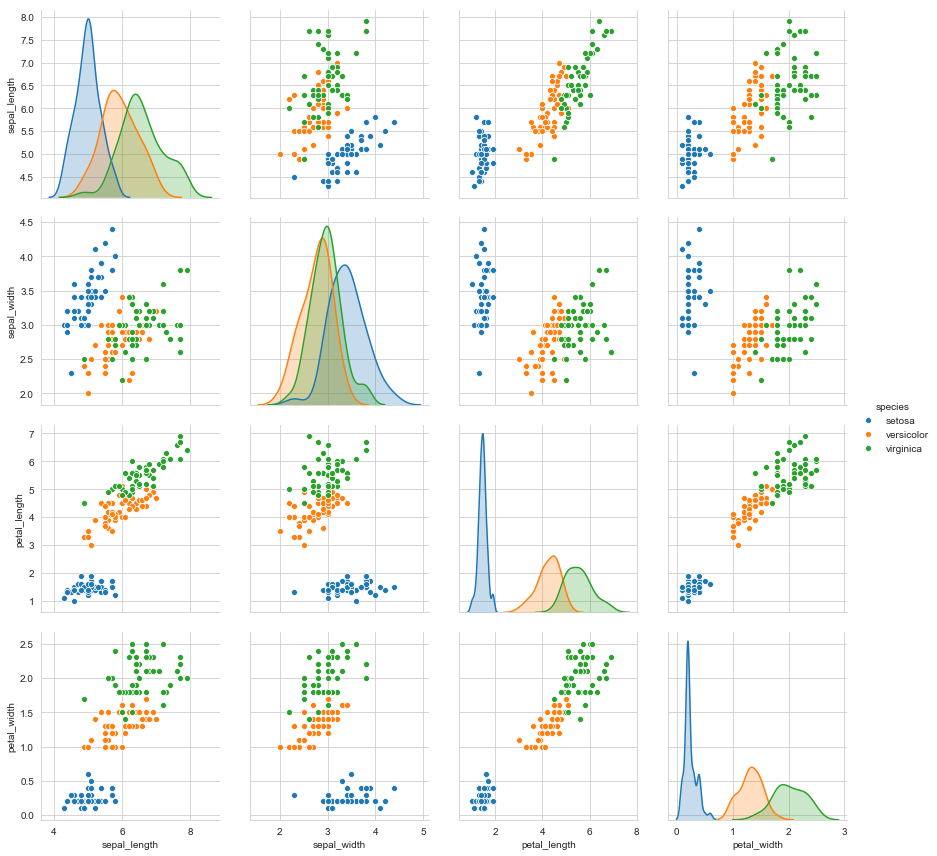

In [6]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.

# instead of reducing dimensations we dar pair plots. so if  there are 4 features, we draw 4C2 totals plots.  This technique is
# not good  if features are many. For smaller number is ok to use pair plot.

plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations

petal_length and petal_width are the most useful features to identify various flower types.
While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.


# (3.4) Histogram, PDF, CDF

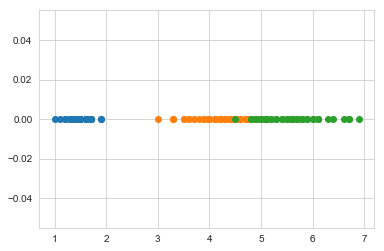

In [7]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
# Y axis all values equal to  0 from species.
# x axis petal length

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense af data points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?
#Ans: Draw histograms for smaller segments as you can see in second diagram  and two more below diagrams, I can draw between points 4 to 5 on x-axis  
#to know PD/density between orange and green bar. PDF will show density of the data. PDF is smooth form of histogram. 
# PDF might be overlapping as well so I can get the data at % of probability say at 90% PD I have orange data points betwen 4 and 5. 


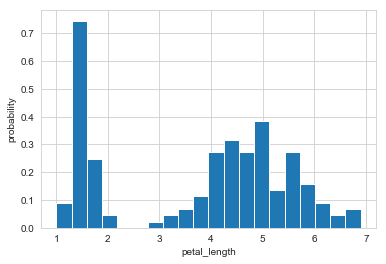

In [8]:
# Plot shows for petal_lengh for bins 20, y=axis shows probabiukity dist.  easyw way to calculate pdf from the chart below.  
import numpy as np
iris_x = iris['petal_length']
plt.hist(iris_x, normed=True, bins=20)
plt.xlabel('petal_length');
plt.ylabel('probability');


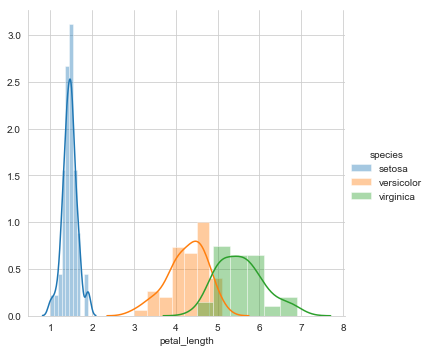

In [9]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();


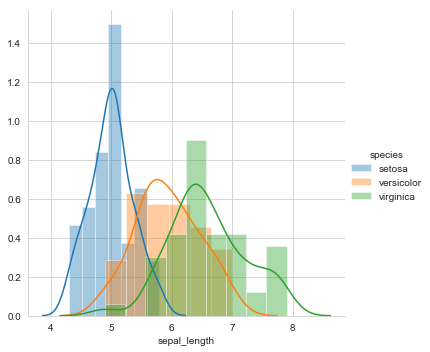

In [10]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

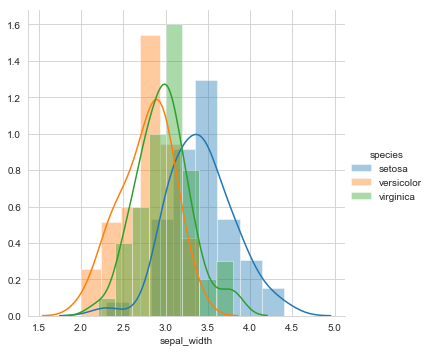

In [11]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


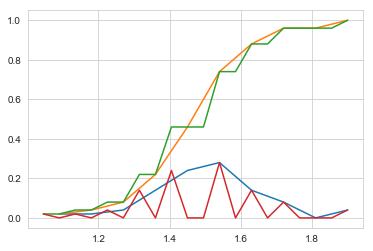

In [12]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
#Ans: How much the data points are condensed in a particular reagion  for a feature or set of features.
## Why is it called a probability plot?
#Ans: We would want to see how much % wise data pomits are captured in aregion for a particualr feature.
## for each value of petal_length, what does the value on y-axis mean?
#Ans: That shows how many data points are there on a particualr of X - axis. 
    
    # Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?
#Ans: Yes.  check if petal_lengh <5 calculate probability of the region where species = "versicolor" 
#as we can see form diagram  probability is 100%.

# Do some of these plots look like a bell-curve you studied in under-grad?
#Ans: They will look like bell curve as long as mean is 0  or near to zero and std dev =1 or near to 1   or we map mean to zero and std dev to 1 
#for all data points on x-axis. 
#CDF can also be calcuated to know total % probability of versicolor.

# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
#Ans: If calculated mean comes to 0, std dev to 1 for all data points on x-axis. 

# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#  calculate CDF from PDF
cdf = np.cumsum(pdf)
# plot both PDF and CDF
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# increase the bin coints so so bins are now double in same region.
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
# Calculate PDF and CDF sice we increased the bin counts.
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:],pdf);

plt.show();




[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


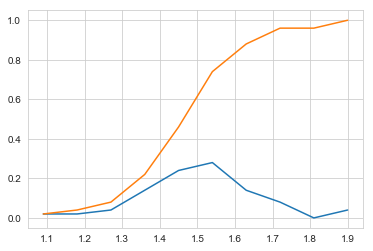

In [13]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?
# as we can see from graph below, < 1.6, CDF is around 82% ( 0.82).
#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


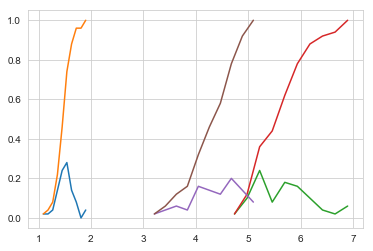

In [14]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [15]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


# (3.6) Median, Percentile, Quantile, IQR, MAD


In [16]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# (3.7) Box plot and Whiskers

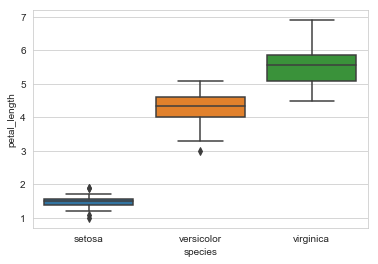

In [17]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

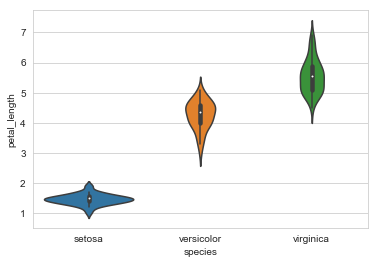

In [18]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing Plots


### Violin Plot: 
Combination of historgram and box plot.  If data is more condensed in middle portion of the graph, violin plot is better to use. 

### Box Plot:
Can be drawn using sea born. These plots look like a box. Plot has line in the middle to show percentile value of  x-axis and y-xasis for each  plot. 


# (3.10) Univariate, bivariate and multivariate analysis.

Univariate analysis is used for single variable to plot. .Histogram is drawn on single feature "age", if I use two varaiables like "age" or "year" to build a model it is called bivariate analysis.For example, box plot, violin plot uare biviraite plots. Abvove plotted If more than two variables are used then  that analysis is called multivariate analysis.

## Conclusion: 
Above exercise we did to learn drawing various varities of plots.  we learnt plots as below:

### Scatter Plot:
As they name implies, this plot scatters the points on plane (data as a collection of points) . Points are plotted based on X-axis and Y-axis features are chosen.  The position of a point depends on its two-dimensional value, where each value is a position on either the horizontal or vertical dimension

### Pair Plot:
They are better used when need to capture relationships between multiple featrures in pair of two. If there are 4 features, we woulkd have 4C2 plots in pair to draw to capture all relationsships in features anmd show in the form of plots. It is a bivariotae plot as each plottd between two features. 

### Histogram: 

Histogram is used to better understand bar chartchar is drawn base  on feature taken on y-axis and on x-axis. x-axis could have bin length for wach bar. Histroghram is also used to derive PDF and CDF. 
Histogram is a univeriate plot. 

### PDF and CDF
PDF → probability density function
CDF → Cumulative density function
Probability looks at probability at one point.
Cumulative is the total probability of anything below it.

### BOX Plot:

Box plot is again bivariate plot. It has higher density presented  in the box so mean of the data would be somehwre inside box plot. above and below box show the data very low volume.

### Violin Plot: 
Very similar to box plot but better way to represent densed data instead showing just one box.  It i a bivariate plot. 


